In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import datetime
import numpy as np
import metloom
import geopandas as gpd

In [70]:
homedir = '/Users/cowherd/Documents/cssltimeseries/'
os.chdir(homedir)
plt.style.use('data/style.mplstyle')
snotel = pd.read_csv('data/snotelinfo.csv')

In [71]:
dts = []
yrs = []
for i in range(len(snotel['start'])):
    val = snotel['start'][i]
    dt = datetime.datetime.strptime(val, '%Y-%B')
    dts.append(dt)
    yrs.append(int(val[0:4]))
snotel['year'] = yrs
snotel['dt'] = dts

In [35]:
total_up = []
counts = snotel.groupby('year').count()['dt']
for yr in range(1937, 2023):
    tmp = np.nansum(counts[counts.index<= yr])
    total_up.append(tmp)



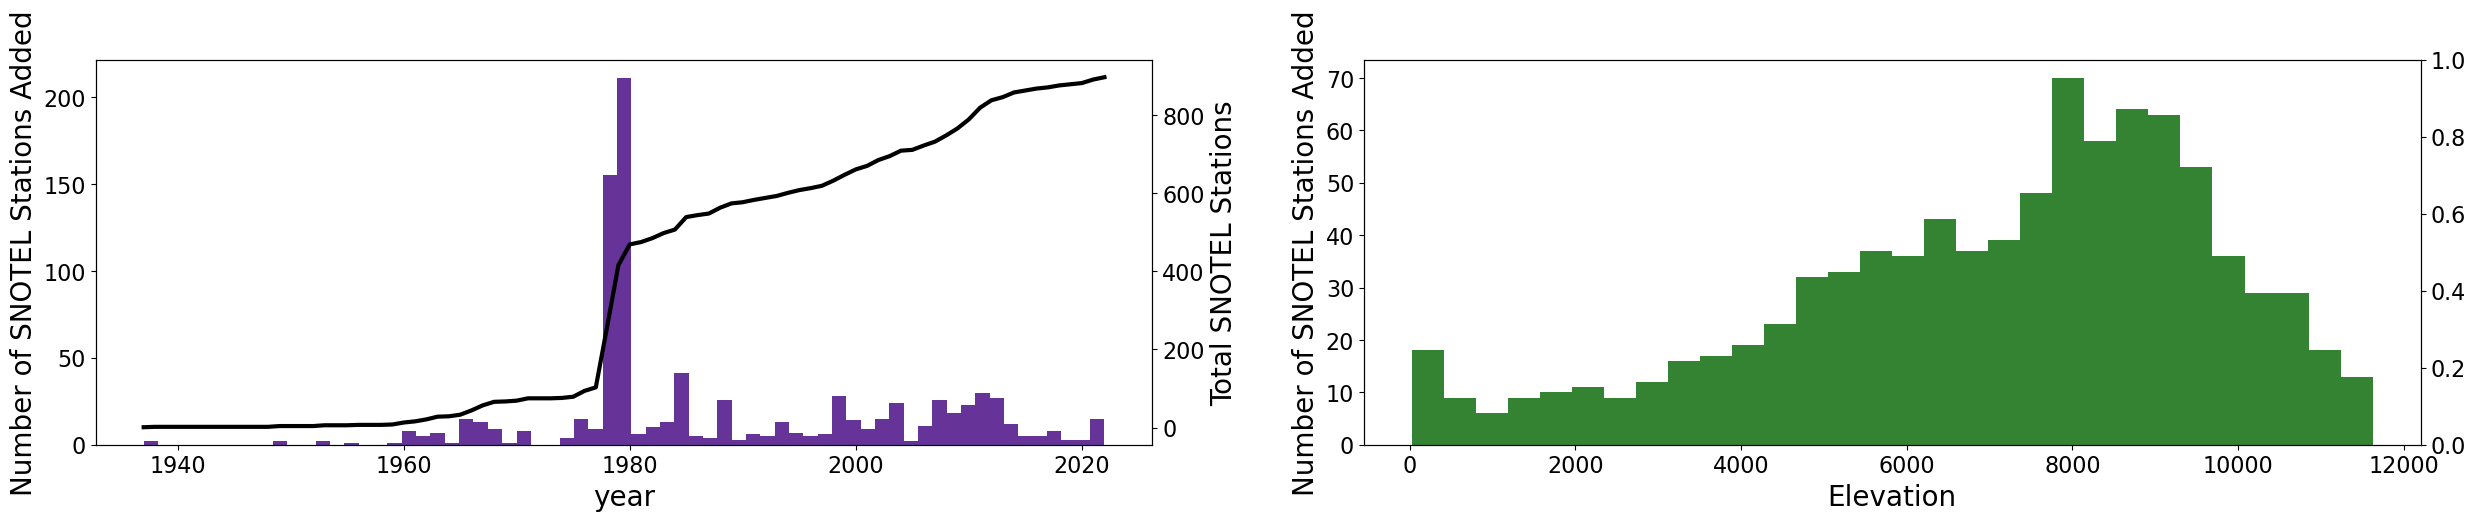

In [75]:
fig,axs=plt.subplots(1,2,figsize=(30,5))
ax2=axs[0].twinx()
axs[0].hist(snotel.year, bins = len(np.unique(snotel.year)),color = 'rebeccapurple')
ax2.plot(range(1937,2023),total_up, color='black')
axs[0].set_ylabel('Number of SNOTEL Stations Added')
ax2.set_ylabel('Total SNOTEL Stations')
axs[0].set_xlabel('year')

ax2=axs[1].twinx()
axs[1].hist(snotel.elev, bins = 30,alpha = 0.8,color = 'darkgreen')
axs[1].set_ylabel('Number of SNOTEL Stations Added')
axs[1].set_xlabel('Elevation')
plt.show()
fig.savefig('snotel-props.png')

NameError: name 'sites_gdf_all' is not defined

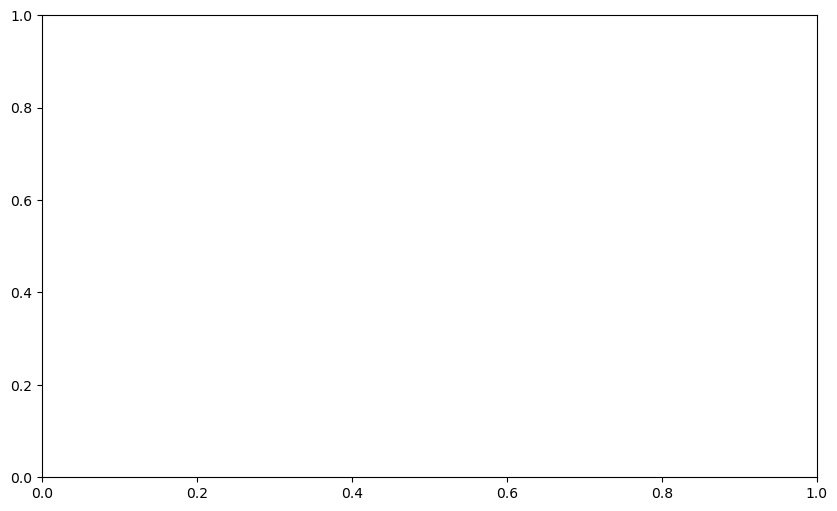

In [50]:
#geojson of state polygons
from metloom.pointdata import CDECPointData
from metloom.variables import CdecStationVariables

states_url = 'http://eric.clst.org/assets/wiki/uploads/Stuff/gz_2010_us_040_00_5m.json'
states_gdf = gpd.read_file(states_url)
f, ax = plt.subplots(figsize=(10,6))

vrs = [
    CdecStationVariables.SWE,
    CdecStationVariables.SNOWDEPTH
]
points = CDECPointData.points_from_geometry(states_gdf, vrs, snow_courses=True)
df = points.to_dataframe()

df.plot(ax=ax, column='elevation_m', markersize=3, cmap='inferno', legend=True, legend_kwds={'label': "Elevation (m)"})
#This prevents matplotlib from updating the axes extent (states polygons cover larger area than SNOTEL points)
ax.autoscale(False)
states_gdf.plot(ax=ax, facecolor='none', edgecolor='k', alpha=0.3);

In [45]:
from datetime import datetime
from metloom.pointdata import SnotelPointData

snotel_point = SnotelPointData("713:CO:SNTL", "MyStation")
df = snotel_point.get_daily_data(
    datetime(2020, 1, 2), datetime(2020, 1, 20),
    [snotel_point.ALLOWED_VARIABLES.SWE]
)
print(df)

                                                                        geometry  \
datetime                  site                                                     
2020-01-02 08:00:00+00:00 713:CO:SNTL  POINT Z (-107.71389 37.89168 11080.00000)   
2020-01-03 08:00:00+00:00 713:CO:SNTL  POINT Z (-107.71389 37.89168 11080.00000)   
2020-01-04 08:00:00+00:00 713:CO:SNTL  POINT Z (-107.71389 37.89168 11080.00000)   
2020-01-05 08:00:00+00:00 713:CO:SNTL  POINT Z (-107.71389 37.89168 11080.00000)   
2020-01-06 08:00:00+00:00 713:CO:SNTL  POINT Z (-107.71389 37.89168 11080.00000)   
2020-01-07 08:00:00+00:00 713:CO:SNTL  POINT Z (-107.71389 37.89168 11080.00000)   
2020-01-08 08:00:00+00:00 713:CO:SNTL  POINT Z (-107.71389 37.89168 11080.00000)   
2020-01-09 08:00:00+00:00 713:CO:SNTL  POINT Z (-107.71389 37.89168 11080.00000)   
2020-01-10 08:00:00+00:00 713:CO:SNTL  POINT Z (-107.71389 37.89168 11080.00000)   
2020-01-11 08:00:00+00:00 713:CO:SNTL  POINT Z (-107.71389 37.89168 11080.00